<a href="https://colab.research.google.com/github/JiyaJulius/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,mean_squared_error, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("brisbane_water_quality.csv")

data.head(10)

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN
5,2023-08-04 23:00:00,1473,1.596,100.271,1.935,NaN,19.834,NaN,7.430,NaN,100.293,NaN,8.158,NaN,35.255,NaN,53.315,NaN,2.124,NaN
6,2023-08-04 23:30:00,1474,6.622,141.844,2.103,NaN,19.829,NaN,7.435,NaN,100.354,NaN,8.158,NaN,35.259,NaN,53.321,NaN,1.950,NaN
7,2023-08-05 00:00:00,1475,9.138,52.005,1.443,NaN,19.822,NaN,7.459,NaN,100.667,NaN,8.159,NaN,35.271,NaN,53.337,NaN,2.033,NaN
8,2023-08-05 00:30:00,1476,2.982,93.117,1.433,NaN,19.804,NaN,7.446,NaN,100.471,NaN,8.166,NaN,35.273,NaN,53.339,NaN,1.995,NaN
9,2023-08-05 01:00:00,1477,9.851,53.062,1.499,NaN,19.770,NaN,7.454,NaN,100.515,NaN,8.168,NaN,35.283,NaN,53.353,NaN,1.973,NaN


In [3]:
data.dtypes

,0
Timestamp,object
Record number,int64
Average Water Speed,float64
Average Water Direction,float64
Chlorophyll,float64
Chlorophyll [quality],float64
Temperature,float64
Temperature [quality],float64
Dissolved Oxygen,float64
Dissolved Oxygen [quality],float64


In [4]:
data.shape

(30894, 20)

In [5]:
data.count()

,0
Timestamp,30894
Record number,30894
Average Water Speed,30874
Average Water Direction,30893
Chlorophyll,30309
Chlorophyll [quality],30086
Temperature,25730
Temperature [quality],25550
Dissolved Oxygen,26594
Dissolved Oxygen [quality],26370


In [6]:
data=data.drop_duplicates()
print(data.isnull().sum())

Timestamp                                      0
Record number                                  0
Average Water Speed                           20
Average Water Direction                        1
Chlorophyll                                  585
Chlorophyll [quality]                        808
Temperature                                 5164
Temperature [quality]                       5344
Dissolved Oxygen                            4300
Dissolved Oxygen [quality]                  4524
Dissolved Oxygen (%Saturation)              5749
Dissolved Oxygen (%Saturation) [quality]    5950
pH                                          1084
pH [quality]                                1308
Salinity                                    3958
Salinity [quality]                          4182
Specific Conductance                        1367
Specific Conductance [quality]              1591
Turbidity                                   2000
Turbidity [quality]                         2224
dtype: int64


In [7]:
data.dropna(inplace=True)

<Axes: xlabel='Dissolved Oxygen'>

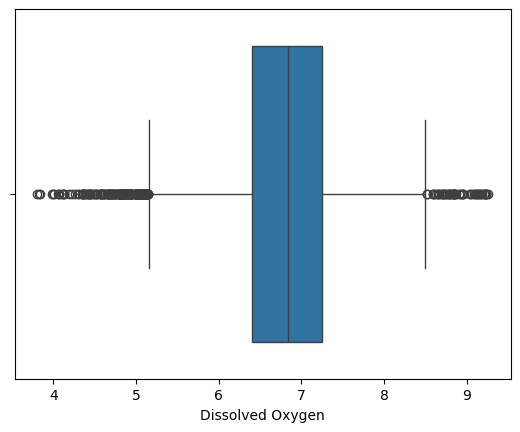

In [8]:
sns.boxplot(x=data['Dissolved Oxygen'])

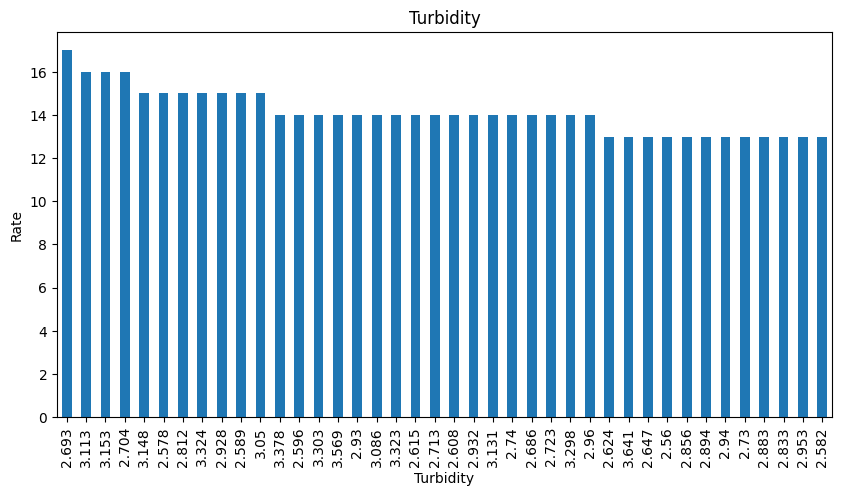

In [9]:
data['Turbidity'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Turbidity")
plt.ylabel('Rate')
plt.xlabel('Turbidity');
plt.show()

In [10]:
# Remove leading/trailing spaces from column names, if any
data.columns = data.columns.str.strip()

# Ensure 'Timestamp' is in the correct datetime format
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
else:
    raise KeyError("The 'Timestamp' column is missing from the dataset.")

# Set 'Timestamp' as the index for resampling
data.set_index('Timestamp', inplace=True)

# Resample data to daily intervals, taking the mean of numeric columns
resampled_data = data.resample('D').mean().reset_index()

# Save or display the resampled data
resampled_data.to_csv('resampled_water_quality_daily.csv', index=False)
resampled_data.head()


,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-09,1703.5,4.354409,168.338818,3.137773,1020.0,19.401318,1020.0,7.880091,1110.000,105.291636,1020.00,8.176091,1020.0,34.864227,1020.0,52.787545,1020.0,2.046818,1020.0
1,2023-08-10,1738.5,4.233146,161.919333,3.135958,1020.0,19.454854,1020.0,7.298229,1040.625,97.682708,1143.75,8.163562,1020.0,34.934604,1020.0,52.883396,1020.0,2.549812,1020.0
2,2023-08-11,1786.5,4.554875,171.022458,2.877375,1020.0,19.611396,1020.0,7.277875,1020.000,97.743604,1226.25,8.162250,1020.0,35.028875,1020.0,53.010792,1020.0,2.077646,1020.0
3,2023-08-12,1834.5,4.384271,182.268792,2.678458,1020.0,20.081875,1020.0,7.081437,1102.500,95.973854,1226.25,8.157312,1020.0,35.102187,1020.0,53.110979,1020.0,1.756417,1020.0
4,2023-08-13,1882.5,4.891042,175.934146,2.532625,1020.0,20.564792,1020.0,6.886187,1102.500,94.210646,1350.00,8.146667,1020.0,35.182896,1020.0,53.223292,1020.0,1.828083,1020.0


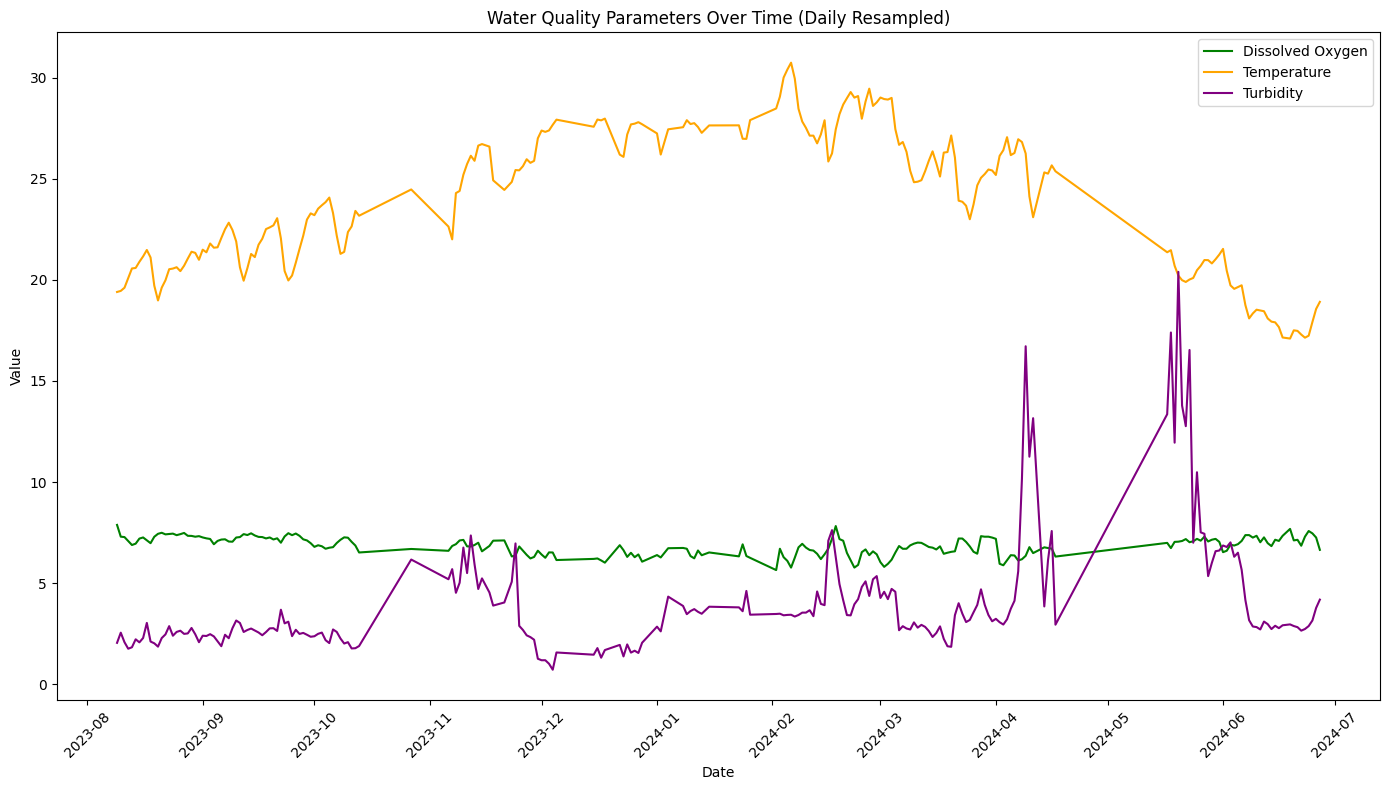

In [11]:
# Plot resampled data for key parameters
plt.figure(figsize=(14, 8))
sns.lineplot(data=resampled_data, x='Timestamp', y='Dissolved Oxygen', label='Dissolved Oxygen', color='green')
sns.lineplot(data=resampled_data, x='Timestamp', y='Temperature', label='Temperature', color='orange')
sns.lineplot(data=resampled_data, x='Timestamp', y='Turbidity', label='Turbidity', color='purple')

# Add plot title and labels
plt.title('Water Quality Parameters Over Time (Daily Resampled)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

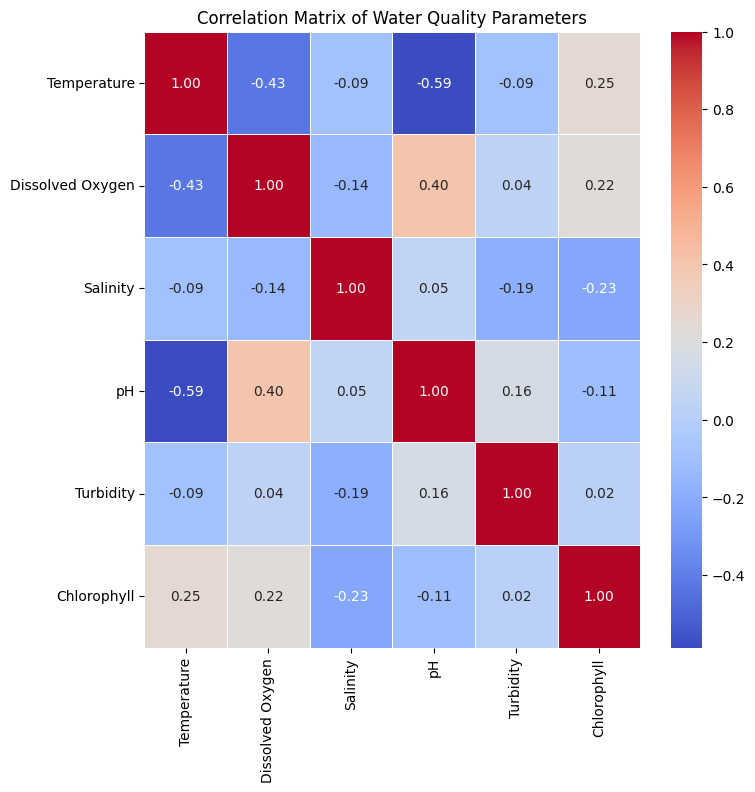

In [12]:
parameters = ['Temperature', 'Dissolved Oxygen', 'Salinity', 'pH', 'Turbidity', 'Chlorophyll']

# Ensure the selected parameters are present in the dataset
data = data[parameters]

# Calculate correlation matrix
correlation_matrix = data.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

In [13]:
data.corr()

,Temperature,Dissolved Oxygen,Salinity,pH,Turbidity,Chlorophyll
Temperature,1.000000,-0.428497,-0.094604,-0.586605,-0.094775,0.253745
Dissolved Oxygen,-0.428497,1.000000,-0.137008,0.402454,0.038345,0.224995
Salinity,-0.094604,-0.137008,1.000000,0.046508,-0.185378,-0.231481
pH,-0.586605,0.402454,0.046508,1.000000,0.157778,-0.114857
Turbidity,-0.094775,0.038345,-0.185378,0.157778,1.000000,0.019543
Chlorophyll,0.253745,0.224995,-0.231481,-0.114857,0.019543,1.000000


<ipython-input-14-a93e26f8a436>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='flare')


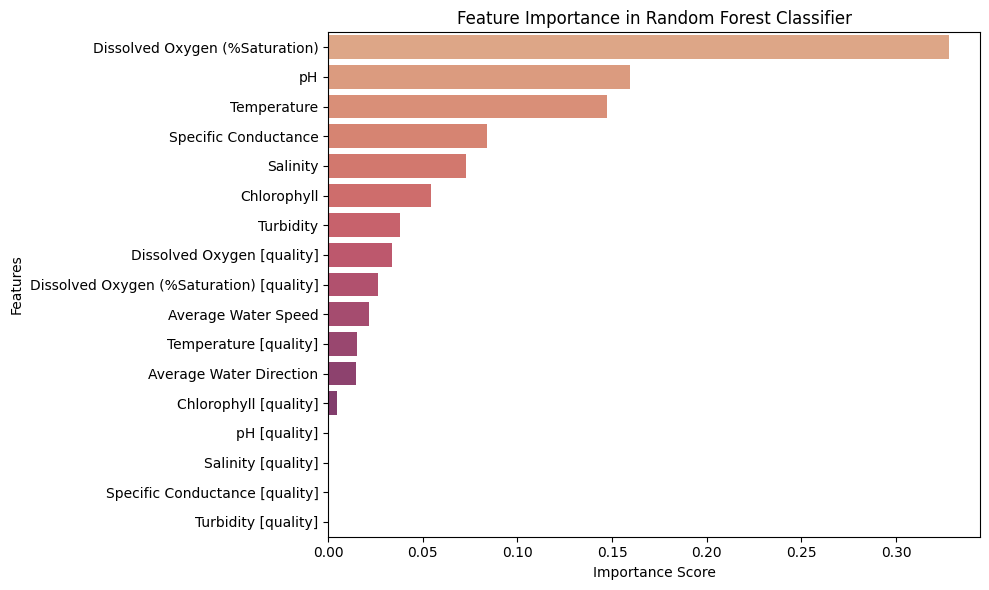

In [14]:
data = pd.read_csv('brisbane_water_quality.csv')

data.columns = data.columns.str.strip()  # Remove leading/trailing spaces from column names
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Convert Timestamp to datetime
data = data.drop(columns=['Timestamp', 'Record number'])  # Remove non-feature columns

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define features (X) and target (y)
# Assuming 'Dissolved Oxygen' is the target variable, create it based on a threshold
data_imputed['Dissolved Oxygen'] = (data_imputed['Dissolved Oxygen'] > data_imputed['Dissolved Oxygen'].mean()).astype(int)
X = data_imputed.drop(columns=['Dissolved Oxygen', 'Dissolved Oxygen'])
y = data_imputed['Dissolved Oxygen']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Extract feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='flare')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Accuracy: 98.14%
Confusion Matrix:
[[3505   50]
 [  65 2559]]


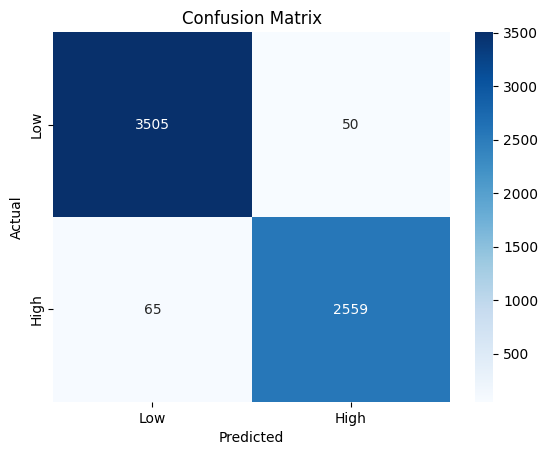

Mean Squared Error: 0.018611425797054538

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3555
           1       0.98      0.98      0.98      2624

    accuracy                           0.98      6179
   macro avg       0.98      0.98      0.98      6179
weighted avg       0.98      0.98      0.98      6179



In [15]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))